<a href="https://colab.research.google.com/github/jjbmsda/QML/blob/main/%08XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pennylane torch numpy matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0: Loss = 0.4324
Epoch 10: Loss = 0.2196
Epoch 20: Loss = 0.1797
Epoch 30: Loss = 0.1756
Epoch 40: Loss = 0.1681
Epoch 50: Loss = 0.1647
Epoch 60: Loss = 0.1612
Epoch 70: Loss = 0.1565
Epoch 80: Loss = 0.1527
Epoch 90: Loss = 0.1516
Final Predictions: [[0.3724432  0.36251923]
 [0.57779396 0.60381573]
 [0.5926683  0.59288603]
 [0.3751223  0.36194602]]


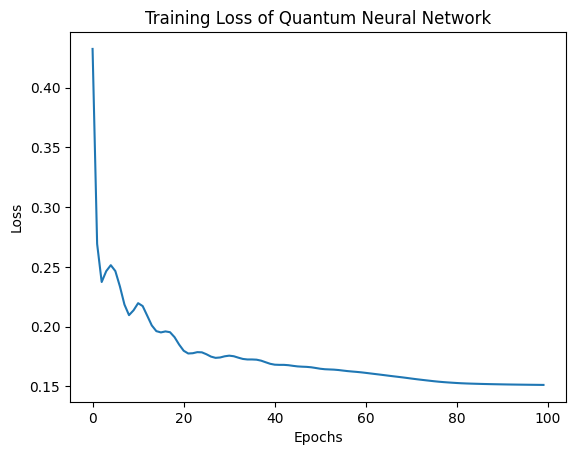

In [2]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 2개의 큐비트로 양자 회로 생성
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# 양자 회로 정의
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))  # 입력을 양자 상태로 변환
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))  # 얽힘 적용
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]  # 측정 결과 반환

# 양자 뉴럴 네트워크 클래스
class QuantumNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        weight_shapes = {"weights": (3, n_qubits, 3)}  # 3개의 양자 게이트 레이어
        self.qlayer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

    def forward(self, x):
        return self.qlayer(x)

# XOR 데이터 생성
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# 모델 초기화
model = QuantumNeuralNetwork()
criterion = nn.MSELoss()  # 손실 함수 (Mean Squared Error)
optimizer = optim.Adam(model.parameters(), lr=0.1)  # 옵티마이저

# 학습
epochs = 100
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 최종 모델 평가
print("Final Predictions:", model(X).detach().numpy())

# 결과 시각화
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss of Quantum Neural Network")
plt.show()


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0: Loss = 1.2832
Epoch 10: Loss = 1.0329
Epoch 20: Loss = 1.0039
Epoch 30: Loss = 1.0010
Epoch 40: Loss = 1.0008
Epoch 50: Loss = 1.0004
Epoch 60: Loss = 1.0001
Epoch 70: Loss = 1.0000
Epoch 80: Loss = 1.0000
Epoch 90: Loss = 1.0000
Final Predictions: [-0.00080833  0.00045533 -0.00012149  0.0019154 ]


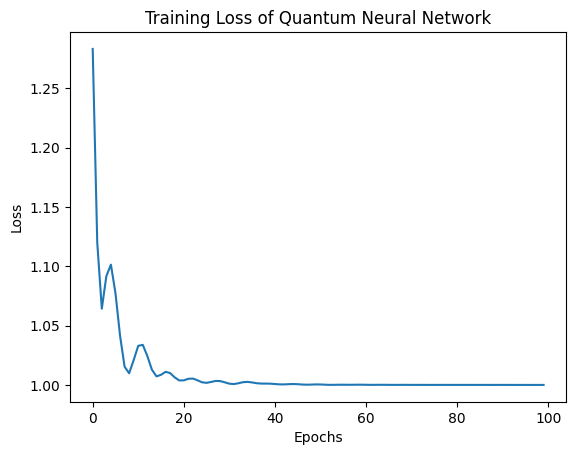

In [3]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 2개의 큐비트를 사용
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# 양자 회로 정의
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))  # 입력을 양자 상태로 변환
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))  # 얽힘 적용
    return qml.expval(qml.PauliZ(0))  # 한 개의 값만 출력

# 양자 뉴럴 네트워크 클래스
class QuantumNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        weight_shapes = {"weights": (5, n_qubits, 3)}  # 레이어 수 증가
        self.qlayer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

    def forward(self, x):
        return self.qlayer(x)

# XOR 데이터 (-1 ~ 1 범위로 조정)
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[-1], [1], [1], [-1]], dtype=torch.float32)

# 모델 초기화
model = QuantumNeuralNetwork()
criterion = nn.MSELoss()  # 손실 함수 (Mean Squared Error)
optimizer = optim.Adam(model.parameters(), lr=0.05)  # 학습률 조정

# 학습
epochs = 100
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 최종 모델 평가
print("Final Predictions:", model(X).detach().numpy())

# 결과 시각화
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss of Quantum Neural Network")
plt.show()


Epoch 0: Loss = 1.2041
Epoch 10: Loss = 0.3560
Epoch 20: Loss = 0.3543
Epoch 30: Loss = 0.3451
Epoch 40: Loss = 0.3416
Epoch 50: Loss = 0.3408
Epoch 60: Loss = 0.3401
Epoch 70: Loss = 0.3399
Epoch 80: Loss = 0.3399
Epoch 90: Loss = 0.3399
Final Predictions: [[0.23204431]
 [0.65914404]
 [0.6600324 ]
 [0.23143336]]


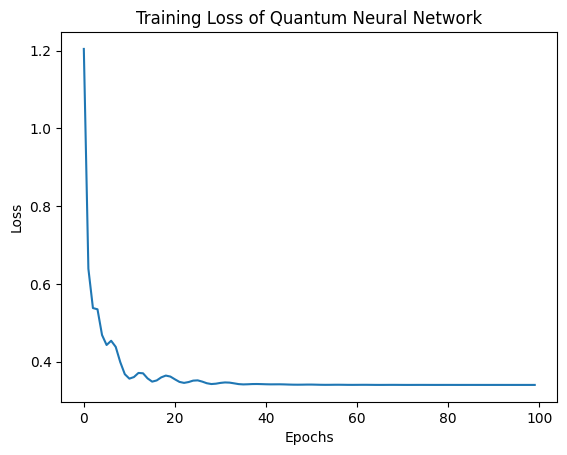

In [5]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 2개의 큐비트를 사용
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# 양자 회로 정의
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))  # 입력을 양자 상태로 변환
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))  # 얽힘 적용
    return qml.expval(qml.PauliZ(0))  # 한 개의 값만 출력

# 양자 뉴럴 네트워크 클래스
class QuantumNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        weight_shapes = {"weights": (6, n_qubits, 3)}  # 레이어 수 증가
        self.qlayer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

    def forward(self, x):
        return self.qlayer(x)

# XOR 데이터 (-1 ~ 1 범위로 조정)
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)  # 0~1 범위로 유지 (BCELoss 사용)

# 모델 초기화
model = QuantumNeuralNetwork()

# 가중치 랜덤 초기화 추가
for param in model.parameters():
    nn.init.uniform_(param, -0.1, 0.1)

# 손실 함수 변경 (MSE → BCE)
criterion = nn.BCELoss()

# 학습률 증가
optimizer = optim.Adam(model.parameters(), lr=0.1)

# 학습
epochs = 100
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X).unsqueeze(1)  # 출력값을 2D 텐서로 변환
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 최종 모델 평가
final_output = model(X).unsqueeze(1).detach().numpy()  # 2D 변환
print("Final Predictions:", final_output)

# 결과 시각화
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss of Quantum Neural Network")
plt.show()


Epoch 0: Loss = 0.7652
Epoch 20: Loss = 0.5920
Epoch 40: Loss = 0.5861
Epoch 60: Loss = 0.5850
Epoch 80: Loss = 0.5848
Epoch 100: Loss = 0.5848
Epoch 120: Loss = 0.5848
Epoch 140: Loss = 0.5848
Epoch 160: Loss = 0.5848
Epoch 180: Loss = 0.5848
Epoch 200: Loss = 0.5848
Epoch 220: Loss = 0.5848
Epoch 240: Loss = 0.5848
Epoch 260: Loss = 0.5848
Epoch 280: Loss = 0.5848
Final Predictions: [[0.4427894 ]
 [0.55721056]
 [0.55721056]
 [0.4427894 ]]


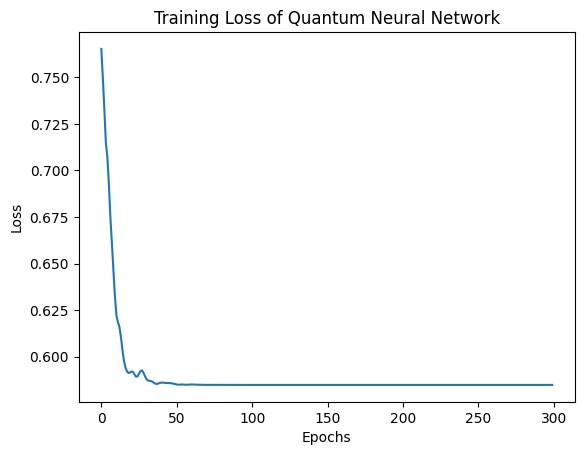

In [6]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 2개의 큐비트를 사용
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# 양자 회로 정의
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))  # 입력을 양자 상태로 변환
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))  # 얽힘 적용
    return qml.expval(qml.PauliZ(0))  # 한 개의 값만 출력

# 양자 뉴럴 네트워크 클래스
class QuantumNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        weight_shapes = {"weights": (8, n_qubits, 3)}  # 레이어 수 증가 (8개)
        self.qlayer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

    def forward(self, x):
        return self.qlayer(x)

# XOR 데이터 (-1 ~ 1 범위로 조정)
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)  # 0~1 범위로 유지 (BCELoss 사용)

# 모델 초기화
model = QuantumNeuralNetwork()

# 가중치 랜덤 초기화 추가
for param in model.parameters():
    nn.init.uniform_(param, -0.1, 0.1)

# 손실 함수 변경 (MSE → BCE)
criterion = nn.BCELoss()

# 학습률 감소 (안정성 개선)
optimizer = optim.Adam(model.parameters(), lr=0.05)

# 학습 횟수 증가 (더 정밀한 학습)
epochs = 300
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()

    output = torch.sigmoid(model(X).unsqueeze(1))  # 시그모이드 활성화 적용
    loss = criterion(output, y)

    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 최종 모델 평가
final_output = torch.sigmoid(model(X).unsqueeze(1)).detach().numpy()  # 시그모이드 적용
print("Final Predictions:", final_output)

# 결과 시각화
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss of Quantum Neural Network")
plt.show()


Epoch 0: Loss = 0.7465
Epoch 50: Loss = 0.4006
Epoch 100: Loss = 0.3990
Epoch 150: Loss = 0.3990
Epoch 200: Loss = 0.3990
Epoch 250: Loss = 0.3990
Epoch 300: Loss = 0.3990
Epoch 350: Loss = 0.3990
Epoch 400: Loss = 0.3990
Epoch 450: Loss = 0.3990
Final Predictions: [[0.16314965]
 [0.53795993]
 [0.53795993]
 [0.16314985]]


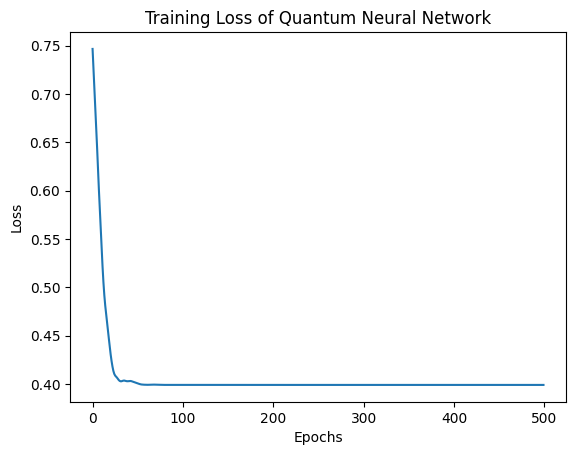

In [7]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 2개의 큐비트를 사용
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# 양자 회로 정의
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))  # 입력을 양자 상태로 변환
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))  # 얽힘 적용
    return qml.expval(qml.PauliZ(0))  # 한 개의 값만 출력

# 양자 뉴럴 네트워크 클래스
class QuantumNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        weight_shapes = {"weights": (12, n_qubits, 3)}  # 레이어 수 증가 (12개)
        self.qlayer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

    def forward(self, x):
        return torch.tanh(self.qlayer(x))  # 출력에 tanh 활성화 적용

# XOR 데이터 (-1 ~ 1 범위로 조정)
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)  # 0~1 범위 유지 (BCELoss 사용)

# 모델 초기화
model = QuantumNeuralNetwork()

# 가중치 랜덤 초기화 추가
for param in model.parameters():
    nn.init.uniform_(param, -0.1, 0.1)

# 손실 함수 변경 (MSE → BCE)
criterion = nn.BCELoss()

# 학습률 감소 (안정성 개선)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 학습 횟수 증가 (더 정밀한 학습)
epochs = 500
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()

    output = model(X).unsqueeze(1)  # 출력값을 2D 텐서로 변환
    loss = criterion(output, y)

    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 최종 모델 평가
final_output = model(X).unsqueeze(1).detach().numpy()
print("Final Predictions:", final_output)

# 결과 시각화
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss of Quantum Neural Network")
plt.show()


Epoch 0: Loss = 0.7541
Epoch 50: Loss = 0.5849
Epoch 100: Loss = 0.5850
Epoch 150: Loss = 0.5852
Epoch 200: Loss = 0.5853
Epoch 250: Loss = 0.5852
Epoch 300: Loss = 0.5851
Epoch 350: Loss = 0.5851
Epoch 400: Loss = 0.5855
Epoch 450: Loss = 0.5851
Epoch 500: Loss = 0.5850
Epoch 550: Loss = 0.5853
Epoch 600: Loss = 0.5849
Epoch 650: Loss = 0.5851
Epoch 700: Loss = 0.5855
Epoch 750: Loss = 0.5849
Epoch 800: Loss = 0.5849
Epoch 850: Loss = 0.5853
Epoch 900: Loss = 0.5849
Epoch 950: Loss = 0.5849
Final Predictions: [[0.42351836]
 [0.5404577 ]
 [0.53925645]
 [0.4281209 ]]


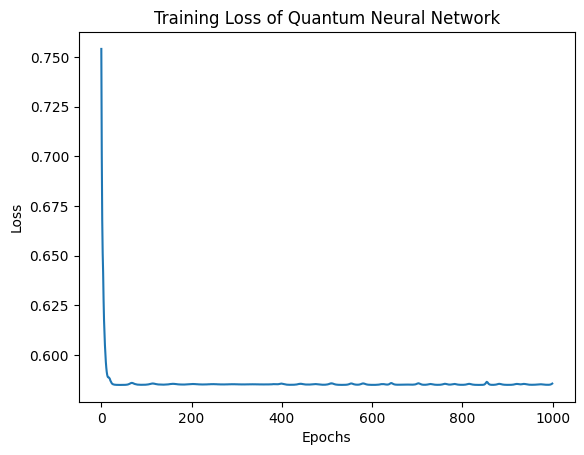

In [8]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 2개의 큐비트를 사용
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# 양자 회로 정의
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))  # 입력을 양자 상태로 변환
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))  # 얽힘 적용
    return qml.expval(qml.PauliZ(0))  # 한 개의 값만 출력

# 양자 뉴럴 네트워크 클래스
class QuantumNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        weight_shapes = {"weights": (16, n_qubits, 3)}  # 레이어 수 증가 (16개)
        self.qlayer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

    def forward(self, x):
        return torch.sigmoid(self.qlayer(x))  # 출력에 sigmoid 활성화 적용

# XOR 데이터 (0~1 범위로 유지)
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)  # BCELoss 사용

# 모델 초기화
model = QuantumNeuralNetwork()

# 가중치 랜덤 초기화 추가
for param in model.parameters():
    nn.init.uniform_(param, -0.1, 0.1)

# 손실 함수 변경 (MSE → BCE)
criterion = nn.BCELoss()

# 옵티마이저 변경 (Adam → RMSprop) & 학습률 감소
optimizer = optim.RMSprop(model.parameters(), lr=0.005)

# 학습 횟수 증가 (더 정밀한 학습)
epochs = 1000
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()

    output = model(X).unsqueeze(1)  # 출력값을 2D 텐서로 변환
    loss = criterion(output, y)

    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 최종 모델 평가
final_output = model(X).unsqueeze(1).detach().numpy()
print("Final Predictions:", final_output)

# 결과 시각화
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss of Quantum Neural Network")
plt.show()


Epoch 0: Loss = 0.2780
Epoch 50: Loss = 0.1266
Epoch 100: Loss = 0.1148
Epoch 150: Loss = 0.1147
Epoch 200: Loss = 0.1147
Epoch 250: Loss = 0.1147
Epoch 300: Loss = 0.1147
Epoch 350: Loss = 0.1147
Epoch 400: Loss = 0.1147
Epoch 450: Loss = 0.1147
Epoch 500: Loss = 0.1147
Epoch 550: Loss = 0.1147
Epoch 600: Loss = 0.1147
Epoch 650: Loss = 0.1147
Epoch 700: Loss = 0.1147
Epoch 750: Loss = 0.1147
Epoch 800: Loss = 0.1147
Epoch 850: Loss = 0.1147
Epoch 900: Loss = 0.1147
Epoch 950: Loss = 0.1147
Final Predictions: [[0.24389724]
 [0.58776814]
 [0.58776826]
 [0.2438973 ]]


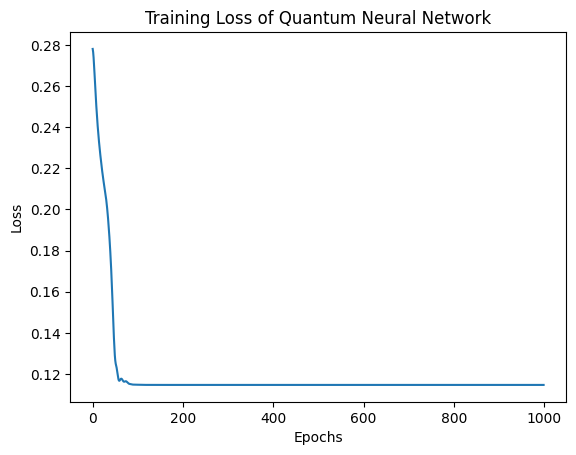

In [9]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 2개의 큐비트를 사용
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# 양자 회로 정의
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))  # 입력을 양자 상태로 변환
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))  # 얽힘 적용
    return qml.expval(qml.PauliZ(0))  # 한 개의 값만 출력

# 양자 뉴럴 네트워크 클래스
class QuantumNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        weight_shapes = {"weights": (24, n_qubits, 3)}  # 레이어 수 증가 (24개)
        self.qlayer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

    def forward(self, x):
        return torch.tanh(self.qlayer(x))  # 출력층에 tanh 활성화 적용

# XOR 데이터 (0~1 범위로 유지)
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)  # MSELoss 사용

# 모델 초기화
model = QuantumNeuralNetwork()

# 가중치 랜덤 초기화 추가
for param in model.parameters():
    nn.init.uniform_(param, -0.2, 0.2)  # 가중치 범위 확대

# 손실 함수 변경 (BCE → MSE)
criterion = nn.MSELoss()

# 옵티마이저 변경 (SGD + Momentum)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 학습 횟수 증가 (더 정밀한 학습)
epochs = 1000
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()

    output = model(X).unsqueeze(1)  # 출력값을 2D 텐서로 변환
    loss = criterion(output, y)

    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 최종 모델 평가
final_output = model(X).unsqueeze(1).detach().numpy()
print("Final Predictions:", final_output)

# 결과 시각화
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss of Quantum Neural Network")
plt.show()


Epoch 0: Loss = 0.2898
Epoch 100: Loss = 0.1961
Epoch 200: Loss = 0.1961
Epoch 300: Loss = 0.1961
Epoch 400: Loss = 0.1961
Epoch 500: Loss = 0.1961
Epoch 600: Loss = 0.1961
Epoch 700: Loss = 0.1961
Epoch 800: Loss = 0.1961
Epoch 900: Loss = 0.1961
Epoch 1000: Loss = 0.1961
Epoch 1100: Loss = 0.1961
Epoch 1200: Loss = 0.1961
Epoch 1300: Loss = 0.1961
Epoch 1400: Loss = 0.1961
Final Predictions: [[0.44278944]
 [0.55721056]
 [0.55721056]
 [0.4427895 ]]


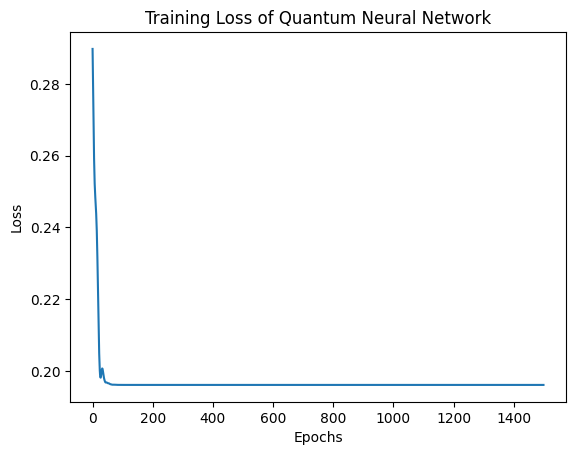

In [10]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 2개의 큐비트를 사용
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# 양자 회로 정의 (얽힘 게이트 추가)
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))  # 입력을 양자 상태로 변환
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))  # 얽힘 강화
    qml.CNOT(wires=[0, 1])  # 추가 얽힘 적용
    return qml.expval(qml.PauliZ(0))  # 한 개의 값만 출력

# 양자 뉴럴 네트워크 클래스
class QuantumNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        weight_shapes = {"weights": (32, n_qubits, 3)}  # 레이어 수 증가 (32개)
        self.qlayer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

    def forward(self, x):
        return torch.sigmoid(self.qlayer(x))  # 출력에 sigmoid 활성화 적용

# XOR 데이터 (0~1 범위로 유지)
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)  # MSELoss 사용

# 모델 초기화
model = QuantumNeuralNetwork()

# 가중치 랜덤 초기화 추가 (범위 확대)
for param in model.parameters():
    nn.init.uniform_(param, -0.5, 0.5)  # 기존보다 큰 값으로 초기화

# 손실 함수 변경 (MSE)
criterion = nn.MSELoss()

# 옵티마이저 변경 (Adam + 낮은 학습률)
optimizer = optim.Adam(model.parameters(), lr=0.005)

# 학습 횟수 증가 (더 정밀한 학습)
epochs = 1500
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()

    output = model(X).unsqueeze(1)  # 출력값을 2D 텐서로 변환
    loss = criterion(output, y)

    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 최종 모델 평가
final_output = model(X).unsqueeze(1).detach().numpy()
print("Final Predictions:", final_output)

# 결과 시각화
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss of Quantum Neural Network")
plt.show()


Epoch 0: Loss = 0.2794
Epoch 100: Loss = 0.1961
Epoch 200: Loss = 0.1961
Epoch 300: Loss = 0.1961
Epoch 400: Loss = 0.1961
Epoch 500: Loss = 0.1961
Epoch 600: Loss = 0.1961
Epoch 700: Loss = 0.1961
Epoch 800: Loss = 0.1961
Epoch 900: Loss = 0.1961
Epoch 1000: Loss = 0.1961
Epoch 1100: Loss = 0.1961
Epoch 1200: Loss = 0.1961
Epoch 1300: Loss = 0.1961
Epoch 1400: Loss = 0.1961
Epoch 1500: Loss = 0.1961
Epoch 1600: Loss = 0.1961
Epoch 1700: Loss = 0.1961
Epoch 1800: Loss = 0.1961
Epoch 1900: Loss = 0.1961
Final Predictions: [[0.44278923]
 [0.55721027]
 [0.5572103 ]
 [0.44278923]]


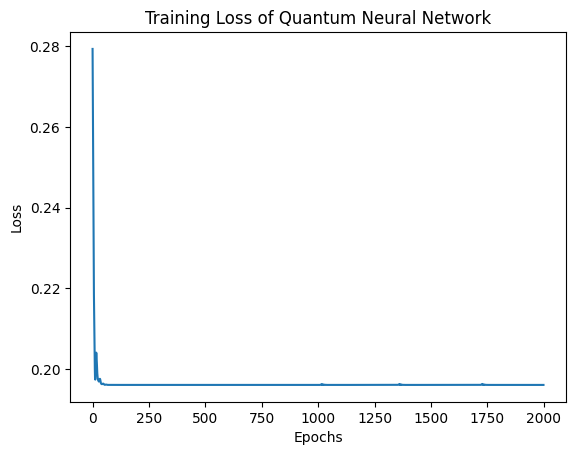

In [3]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 2개의 큐비트를 사용
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# 양자 회로 정의 (얽힘 패턴 변경)
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))  # 입력을 양자 상태로 변환
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))  # 얽힘 강화
    qml.CNOT(wires=[0, 1])  # 추가 얽힘 적용
    qml.RY(weights[0, 0, 0], wires=0)  # 더 깊은 양자 회로 적용
    qml.RY(weights[0, 0, 1], wires=1)
    return qml.expval(qml.PauliZ(0))  # 한 개의 값만 출력

# 양자 뉴럴 네트워크 클래스
class QuantumNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        weight_shapes = {"weights": (32, n_qubits, 3)}  # 레이어 수 증가 (32개)
        self.qlayer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

    def forward(self, x):
        return torch.sigmoid(self.qlayer(x))  # 출력층을 sigmoid로 변경

# XOR 데이터 (0~1 범위로 유지)
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)  # MSELoss 사용

# 모델 초기화
model = QuantumNeuralNetwork()

# 가중치 랜덤 초기화 추가 (범위 조정)
for param in model.parameters():
    nn.init.uniform_(param, -0.3, 0.3)  # 학습 안정성 개선

# 손실 함수 변경 (MSE)
criterion = nn.MSELoss()

# 옵티마이저 변경 (Adam + 학습률 증가)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 학습 횟수 증가 (더 정밀한 학습)
epochs = 2000
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()

    output = model(X).unsqueeze(1)  # 출력값을 2D 텐서로 변환
    loss = criterion(output, y)

    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 최종 모델 평가
final_output = model(X).unsqueeze(1).detach().numpy()
print("Final Predictions:", final_output)

# 결과 시각화
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss of Quantum Neural Network")
plt.show()


Epoch 0: Loss = 0.2859
Epoch 100: Loss = 0.2396
Epoch 200: Loss = 0.1712
Epoch 300: Loss = 0.1393
Epoch 400: Loss = 0.1258
Epoch 500: Loss = 0.1192
Epoch 600: Loss = 0.1162
Epoch 700: Loss = 0.1152
Epoch 800: Loss = 0.1148
Epoch 900: Loss = 0.1147
Epoch 1000: Loss = 0.1147
Epoch 1100: Loss = 0.1147
Epoch 1200: Loss = 0.1147
Epoch 1300: Loss = 0.1147
Epoch 1400: Loss = 0.1147
Epoch 1500: Loss = 0.1147
Epoch 1600: Loss = 0.1147
Epoch 1700: Loss = 0.1147
Epoch 1800: Loss = 0.1147
Epoch 1900: Loss = 0.1147
Final Predictions: [[0.24389713]
 [0.5877682 ]
 [0.5877687 ]
 [0.24389713]]


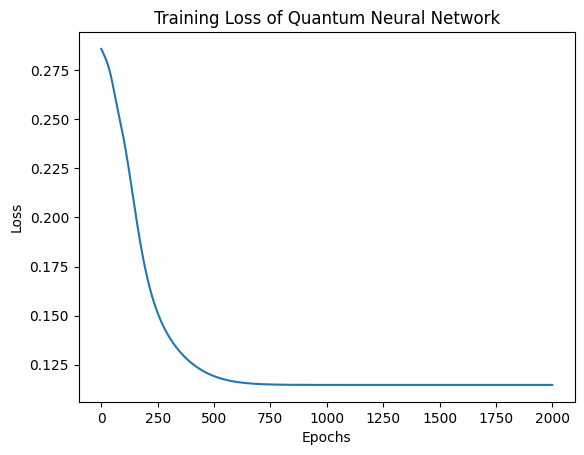

In [4]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 2개의 큐비트를 사용
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# 맞춤형 양자 회로 적용 (RY + CRZ + CNOT)
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))  # 입력을 양자 상태로 변환
    for i in range(5):  # 더 깊은 회로 적용 (depth=5)
        qml.RY(weights[i, 0], wires=0)
        qml.RY(weights[i, 1], wires=1)
        qml.CNOT(wires=[0, 1])
        qml.CRZ(weights[i, 2], wires=[0, 1])  # 추가 얽힘

    return qml.expval(qml.PauliZ(0))  # 한 개의 값만 출력

# 양자 뉴럴 네트워크 클래스
class QuantumNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        weight_shapes = {"weights": (5, 3)}  # 맞춤형 회로이므로 레이어 수 변경
        self.qlayer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

    def forward(self, x):
        return torch.tanh(self.qlayer(x))  # 출력층을 tanh로 변경

# XOR 데이터 (0~1 범위로 유지)
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)  # MSELoss 사용

# 모델 초기화
model = QuantumNeuralNetwork()

# 가중치 랜덤 초기화 추가 (범위 조정)
for param in model.parameters():
    nn.init.uniform_(param, -0.2, 0.2)  # 학습 안정성 개선

# 손실 함수 변경 (MSE)
criterion = nn.MSELoss()

# 옵티마이저 변경 (Adam + 낮은 학습률)
optimizer = optim.Adam(model.parameters(), lr=0.002)

# 학습 횟수 증가 (더 정밀한 학습)
epochs = 2000
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()

    output = model(X).unsqueeze(1)  # 출력값을 2D 텐서로 변환
    loss = criterion(output, y)

    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 최종 모델 평가
final_output = model(X).unsqueeze(1).detach().numpy()
print("Final Predictions:", final_output)

# 결과 시각화
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss of Quantum Neural Network")
plt.show()
